In [2]:
#Astropy
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy import units as u

# Dlnpyutils and ages
from dlnpyutils.utils import bspline,mad,interp
import ages as ages

# dust_extinction
from dust_extinction.parameter_averages import CCM89,O94,F99,VCG04,GCC09,M14,F19,D22

# functools
from functools import partial

# Matplotlib
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline
matplotlib.rcParams.update({'font.size': 25,'axes.facecolor':'w'})
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

#Numpy/Scipy
import numpy as np
import scipy
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# pdb
import pdb

# tqdm 
from tqdm.notebook import tqdm

# PARSEC

In [3]:
massive = fits.getdata('/Users/joshuapovick/Desktop/Research/parsec/parsec36_DR2_EDR3v2.fits')
massive = Table(massive[np.where((massive['label']==3.0)|(massive['label']==7.0))])
int_IMF = massive['int_IMF']
massive = massive['MH','Mass','Mini','delta_int_IMF','logAge','logTe','logg','GEDR3mag','G_BPEDR3mag','G_RPEDR3mag',
                  'Jmag','Hmag','Ksmag','mbolmag','label']

massive['GEDR3mag'].name = 'Gmag'
massive['G_BPEDR3mag'].name = 'BPmag'
massive['G_RPEDR3mag'].name = 'RPmag'

In [7]:
mass2 = fits.getdata('/Users/joshuapovick/Desktop/Research/parsec/parsec36_DR2_EDR3v2.fits')
mass2 = mass2[np.where(mass2['label']==3)]
# print(mass2.columns)
# del mass2

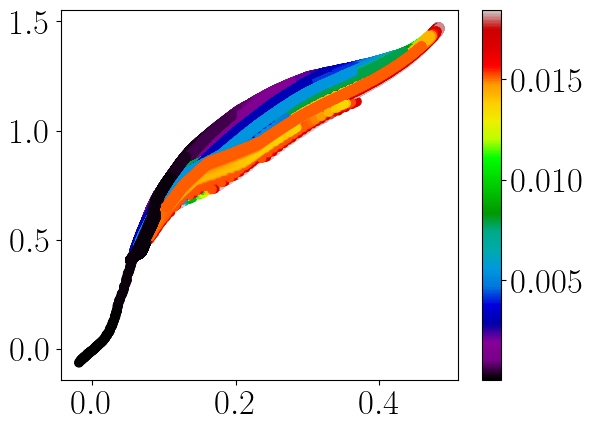

In [11]:
plt.scatter(mass2['Hmag']-mass2['Ksmag'],mass2['Jmag']-mass2['Ksmag'],c=mass2['Xo'],cmap='nipy_spectral')
plt.colorbar()

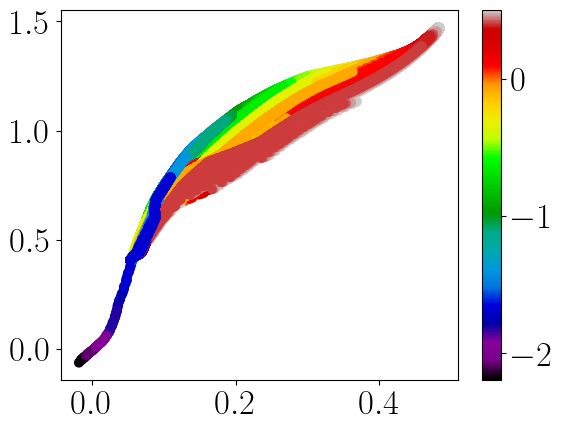

In [14]:
plt.scatter(mass2['Hmag']-mass2['Ksmag'],mass2['Jmag']-mass2['Ksmag'],c=mass2['MH'],cmap='nipy_spectral')
plt.colorbar()

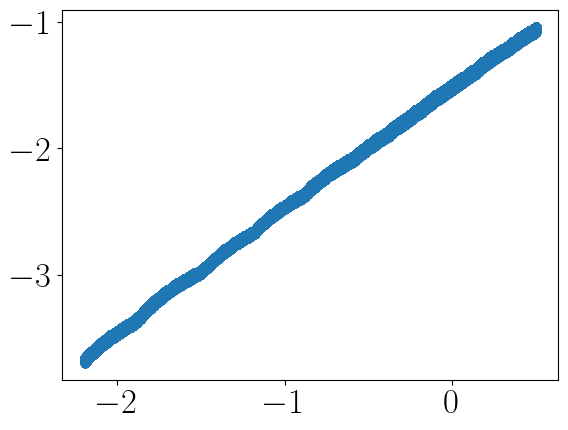

In [13]:
plt.scatter(mass2['MH'],np.log10(mass2['Xo']/0.2))

In [57]:
# teffcut, = np.where(massive['logTe']<np.log10(6000))

# plt.figure(figsize=[12,10])
# plt.scatter(massive['Mass'][teffcut],massive['mbolmag'][teffcut],c=10**massive['logTe'][teffcut],cmap='nipy_spectral')
# plt.colorbar()
# plt.title(r'Color as Teff')
# plt.xlabel(r'Mass')
# plt.ylabel(r'mbolmag')
# plt.show()

In [56]:
# plt.figure(figsize=[12,10])
# plt.scatter(massive['Mass'][teffcut],massive['mbolmag'][teffcut],c=10**massive['logAge'][teffcut]/10**9,cmap='nipy_spectral')
# plt.colorbar()
# plt.title(r'Color as Age')
# plt.xlabel(r'Mass')
# plt.ylabel(r'mbolmag')
# plt.show()

In [55]:
# plt.figure(figsize=[12,10])
# plt.scatter(massive['Mass'][teffcut],massive['mbolmag'][teffcut],c=massive['MH'][teffcut],cmap='nipy_spectral')
# plt.colorbar()
# plt.title(r'Color as [M/H]')
# plt.xlabel(r'Mass')
# plt.ylabel(r'mbolmag')
# plt.show()

In [44]:
10**(-4.74/2.5)

0.012705741052085412

In [4]:
np.max(massive['Mini'])

10.6098508835

In [14]:
from scipy.integrate import quad

def s55(mass):
    '''
    Input:
    -----
        mass: float
              stellar mass in Msun
        
    Output:
    ------
         imf: float
    '''
    
    imf = 0.03*mass**(-1.35)
    return imf
    
# def c

def calc_int_IMF(initial_mass,initial_mass_function):
    '''
    Inputs:
    ------
                 initial_mass: float
                               initial mass limit (upper bound on integration)
                               
        initial_mass_function: function
                               initial mass function to integrate
        
    Output:
    ------
                      int_IMF: float
                               integrated initial mass function value
    '''
    
    int_IMF = 999999.0*np.ones(len(initial_mass))
    for i in tqdm(range(len(int_IMF))):
        int_IMF[i] = quad(initial_mass_function,0,initial_mass[i])[0]
    return int_IMF

In [17]:
calc_int_IMF(massive['Mini'][:100],s55)

  0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/rc/1rzbdsbd3pb_0pd6mhcfkh2r0000gn/T/ipykernel_57482/2717020118.py:38: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  int_IMF[i] = quad(initial_mass_function,0,initial_mass[i])[0]


array([-0.08779908, -0.08777624, -0.08775957, -0.08774113, -0.08772425,
       -0.08770828, -0.08769353, -0.08767906, -0.08766673, -0.08765452,
       -0.08764332, -0.08763317, -0.08762354, -0.08761505, -0.08760722,
       -0.08759962, -0.08759309, -0.08758683, -0.08758088, -0.08757571,
       -0.08757085, -0.08756633, -0.0875623 , -0.08755852, -0.08755503,
       -0.08755181, -0.08754866, -0.08754526, -0.08754367, -0.08754073,
       -0.08754057, -0.08753953, -0.08753713, -0.08753495, -0.08753282,
       -0.08753092, -0.08752912, -0.08752746, -0.08752591, -0.08752446,
       -0.08752284, -0.08752163, -0.08752022, -0.08751896, -0.087518  ,
       -0.08751694, -0.08751595, -0.08751504, -0.08751421, -0.08751343,
       -0.08751272, -0.08751208, -0.08751145, -0.08751091, -0.08751037,
       -0.08750986, -0.08750941, -0.08750897, -0.08750858, -0.08740117,
       -0.08740114, -0.08740109, -0.08740104, -0.08740099, -0.08740092,
       -0.08740078, -0.08740063, -0.08739966, -0.0873986 , -0.08

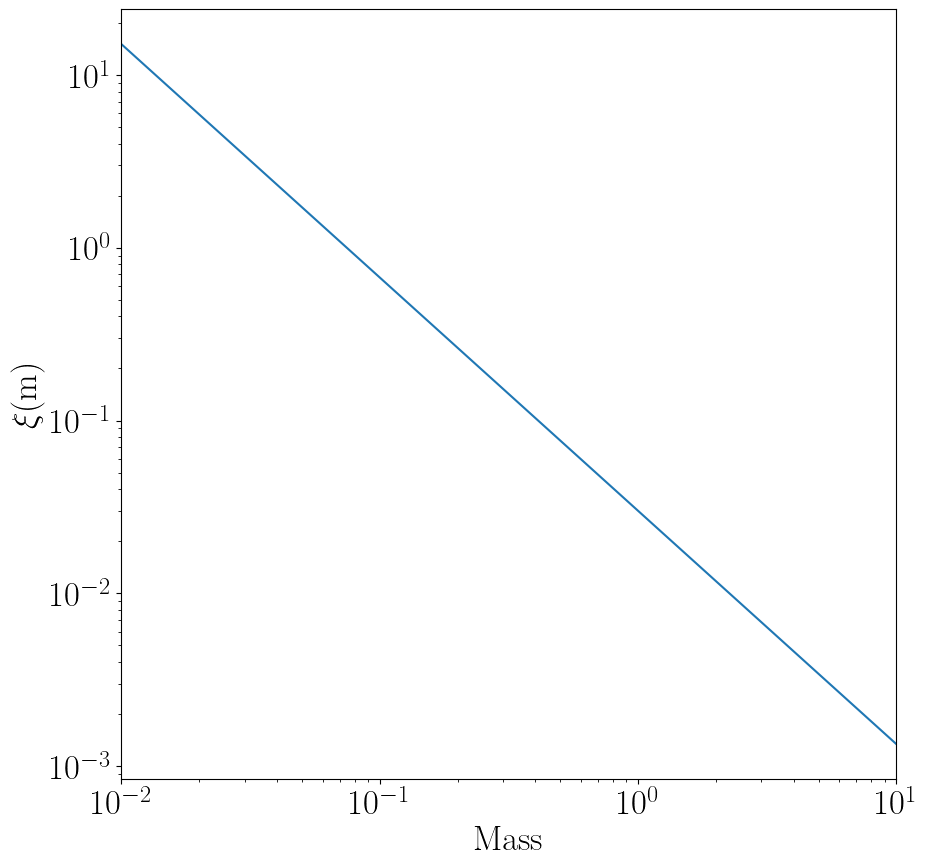

In [38]:
plt.figure(figsize=[10,10])
plt.plot(np.linspace(0.01,10),s55(np.linspace(0.01,10)))
plt.xlim(0.01,10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Mass')
plt.ylabel(r'$\xi$(m)')
plt.show()